# Finding the best chocolate bars

Now let's now move on to the competition and challenge.

## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [ ]:
# Import necessary libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(20,5))

# Read the CSV files
df = pd.read_csv('data/chocolate_bars.csv')

# Explore head of the datasets

df.head()


,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


<Figure size 1440x360 with 0 Axes>

In [ ]:
df.shape

(2530, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [ ]:
df['ingredients'].fillna(method = 'ffill', inplace=True)
df['num_ingredients'] = df['num_ingredients'].fillna(df['num_ingredients'].mean())
df.isna().sum()

id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

In [ ]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.897874,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


DATA ANYALYSIS

In [ ]:
# (1). What is the average rating by country of origin?

avg_rating = df.groupby('bean_origin')['rating'].mean().reset_index().sort_values('rating', ascending=False)
avg_rating

,bean_origin,rating
54,Tobago,3.625000
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
...,...,...
43,Sierra Leone,2.750000
47,St.Vincent-Grenadines,2.750000
38,Principe,2.750000
30,Martinique,2.750000


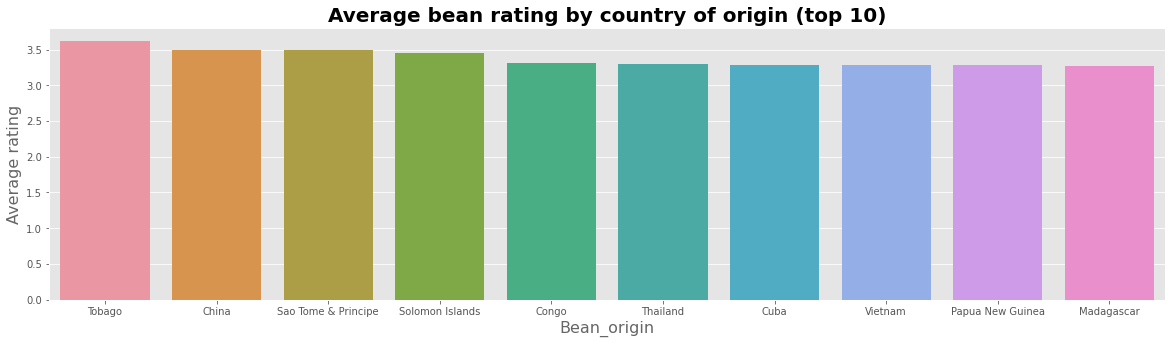

In [ ]:
# Average rating visualisation
plt.figure(figsize=(20,5))
sns.barplot(data=avg_rating[0:10], x='bean_origin', y='rating')
plt.ylabel('Average rating', size=16, alpha=0.9)
plt.xlabel('Bean_origin', size=16, alpha=0.9)
plt.title('Average bean rating by country of origin (top 10)', fontsize=20, fontweight='bold')
plt.show()

In [ ]:
# (2). How many bars were reviewed for each of those countries?

bars_review = df.groupby('bean_origin')['bar_name'].count().reset_index().sort_values('bar_name', ascending=False)
bars_review

,bean_origin,bar_name
60,Venezuela,253
36,Peru,244
13,Dominican Republic,226
14,Ecuador,219
28,Madagascar,177
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


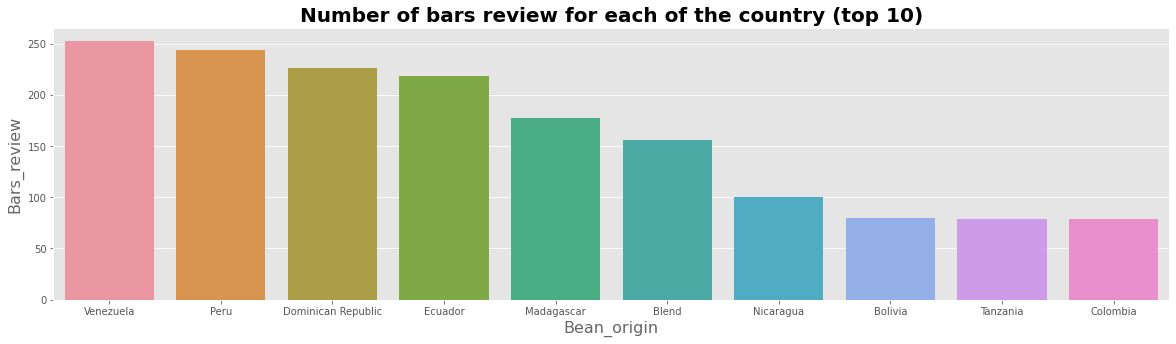

In [ ]:
# Bar review count visualisation
plt.figure(figsize=(20,5))

sns.barplot(data=bars_review[0:10], x='bean_origin', y='bar_name')
plt.xlabel('Bean_origin', size=16, alpha=0.9)
plt.ylabel('Bars_review', size=16, alpha=0.9)
plt.title('Number of bars review for each of the country (top 10)', fontsize=20, fontweight='bold')
plt.show()

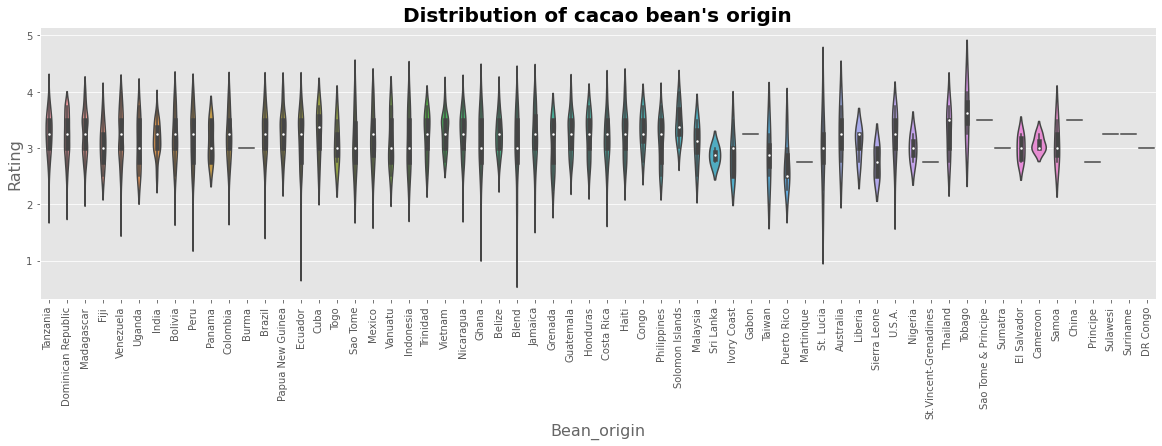

In [ ]:
# (4). Is the cacao bean's origin an indicator of quality?
plt.figure(figsize=(20,5))
sns.violinplot(data=df, x='bean_origin', y='rating')
plt.xticks(rotation=90)
plt.title("Distribution of cacao bean's origin", fontsize=20, fontweight='bold')
plt.xlabel('Bean_origin', size=16, alpha=0.9)
plt.ylabel('Rating', size=16, alpha=0.9)
plt.show()

The median shown by the violin plot is almost the same for all variables irrespective of the distributions. Also, most of the countries has approximately the same rating median. This suggests that the cacao bean_origin is not an indicator of quality.

In [ ]:
# (5).How does cocoa content relate to rating? 

cocoa_content_rating = df['cocoa_percent'].corr(df['rating'])
cocoa_content_rating

-0.1466895950803473

The correlation between cocoa_percent and rating shows a -0.14668959 (negative correlation) which means that cocoa content in a chocolate bar does not influence the rating.

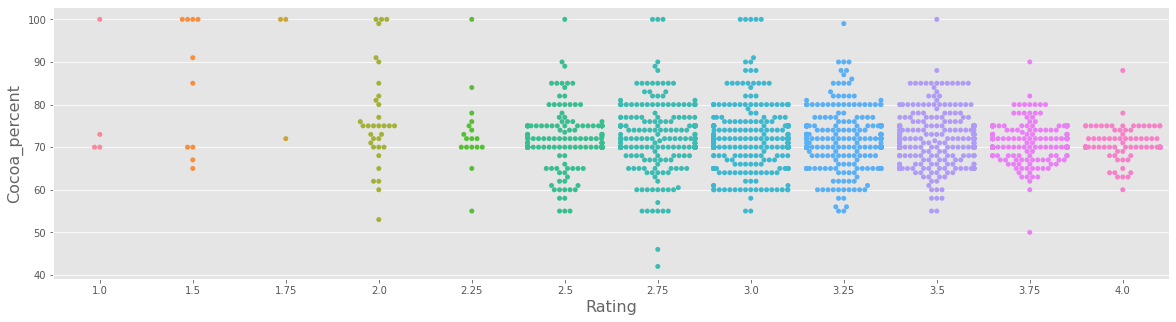

In [ ]:
plt.figure(figsize=(20,5))
sns.swarmplot(y='cocoa_percent', x='rating', data=df)
plt.xlabel('Rating', size=16, alpha=0.9)
plt.ylabel('Cocoa_percent', size=16, alpha=0.9)
plt.show()

In [ ]:
# What is the average cocoa content for bars with higher ratings (above 3.5)?

df.loc[df['rating'] >= 3.5]['cocoa_percent'].mean()

71.10849539406345

In [ ]:
# Average rating with Lecithin

avg_rating_with_lecithin = df.loc[df['ingredients'].str.contains('L')].rating.agg('mean')

avg_rating_with_lecithin

3.136764705882353

In [ ]:
# Average rating without lecithin

avg_rating_without_lecithin = df.loc[~ df['ingredients'].str.contains('L')].rating.agg('mean')
avg_rating_without_lecithin

3.2113861386138614

Text(0, 0.5, 'Average rating')

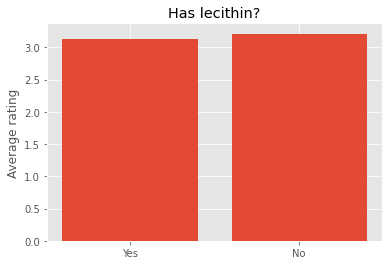

In [ ]:
value_xticks = ["Yes", "No"]
fig, ax=plt.subplots()
ax.bar(x=['Yes', "No"], height=[avg_rating_with_lecithin, avg_rating_without_lecithin])
ax.set_title('Has lecithin?')
ax.set_ylabel('Average rating')

Sumarizing the analysis

1. Choosing the bean originated from countries that are in the top 10 of average rating would be a good choice. 

2. The findings shows that the bar rating with higher than 3.5 average rating has over 70% of its composition as cocoa but overall, cocoa composition does not influence the rating

3. The Chocolate bar has its composition ranged from 42% to 100% of cocoa

4. The findings shows that having or not having Lecithin included in the ingredients does not in anyway influence its ratings.